[0, 16.395, 29.23, 40.94, 51.69, 59.92, 67.615, 74.225, 80.28, 86.045, 91.595, 96.43, 101.135, 105.24, 109.15, 112.925, 116.565, 119.74, 122.88, 125.86, 128.925, 131.535, 134.34, 137.22, 139.725, 142.5, 144.86, 147.5, 150.025, 152.305, 154.63, 156.815, 159.195, 161.615, 163.845, 166.16, 168.15, 170.22, 172.19, 174.36, 176.495, 178.66, 180.73, 182.735, 184.65, 186.785, 188.79, 190.78, 192.59, 194.365, 196.245, 198.16, 200.0, 201.94, 203.62, 205.275, 206.9, 208.68, 210.46, 212.165, 213.93, 215.565, 217.15, 218.855, 220.505, 222.1, 223.77, 225.32, 226.83, 228.56, 230.085, 231.54, 233.245, 234.85, 236.31, 237.72, 239.21, 240.69, 242.09, 243.7, 245.225, 246.68, 248.21, 249.81, 251.385, 252.865, 254.295, 255.63, 257.045, 258.41, 259.77, 261.235, 262.59, 264.03, 265.355, 266.69, 268.25, 269.465, 270.81, 272.15, 273.485, 274.98, 276.34, 277.65, 278.99, 280.34, 281.675, 283.0, 284.425, 285.62, 286.785, 287.985, 289.285, 290.43, 291.66, 292.86, 294.15, 295.405, 296.6, 297.835, 299.055, 300.375, 

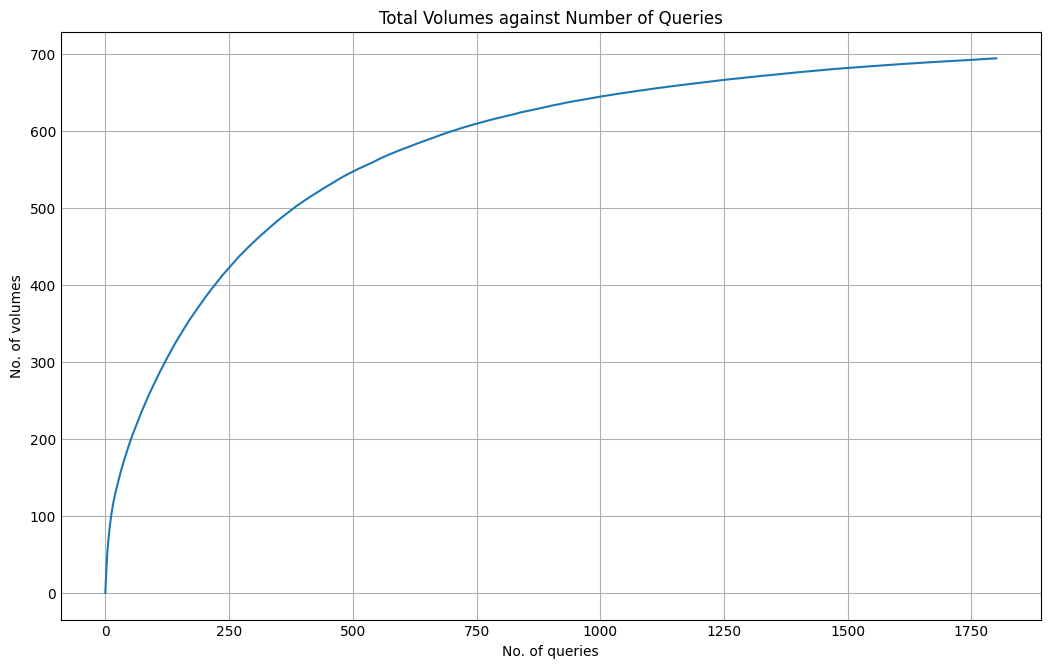

In [1]:
import math 
import random 
import matplotlib.pyplot as plt 

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

RSEmax = 256
max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 1800
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()